In [3]:
# Import necessary libraries
import pandas as pd
from scipy.stats import binom, uniform, norm
import matplotlib.pyplot as plt
import numpy as np

# Upload debugging.csv and sat_score.csv
# Replace 'path_to_debugging_csv' and 'path_to_sat_score_csv' with the file paths
debugging = pd.read_csv("E:\sharda\Technical\debugging.csv")  # Replace with actual file path
sat_score = pd.read_csv('E:\sharda\Technical\score card.csv')  # Replace with actual file path

# Display the first few rows of each dataset
print("Debugging Dataset:")
print(debugging.head())

print("\nSAT Score Dataset:")
print(sat_score.head())


Debugging Dataset:
   Bug ID  Time Taken to fix the bug
0   12986                       2.42
1   12987                       2.03
2   12988                       2.74
3   12989                       3.21
4   12990                       3.40

SAT Score Dataset:
   student_id  score
0           1   1018
1           2   1218
2           3    611
3           4    723
4           5    541


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\JEEVANSH\AppData\Local\Temp\ipykernel_17332\999034696.py:9: SyntaxWarning: invalid escape sequence '\s'
  debugging = pd.read_csv("E:\sharda\Technical\debugging.csv")  # Replace with actual file path
C:\Users\JEEVANSH\AppData\Local\Temp\ipykernel_17332\999034696.py:10: SyntaxWarning: invalid escape sequence '\s'
  sat_score = pd.read_csv('E:\sharda\Technical\score card.csv')  # Replace with actual file path


#### BINOMIAL DISTRIBUTION

In [6]:
# Parameters for the Binomial distribution
n = 10  # Number of visitors
p = 0.8  # Probability of buying souvenirs

# 1. Probability that every visitor buys souvenirs
prob_all_buy = binom.pmf(10, n, p)

# 2. Probability that a maximum of 7 visitors buy souvenirs
prob_max_7 = binom.cdf(7, n, p)

# Print results
print(f"Probability that every visitor will buy souvenirs: {prob_all_buy:.4f}")
print(f"Probability that a maximum of 7 visitors buy souvenirs: {prob_max_7:.4f}")


Probability that every visitor will buy souvenirs: 0.1074
Probability that a maximum of 7 visitors buy souvenirs: 0.3222


## CONTINUOUS UNIFORM 

In [9]:
# Extract 'Time Taken to fix the bug' from the dataset
min_time = debugging['Time Taken to fix the bug'].min()
max_time = debugging['Time Taken to fix the bug'].max()

# Define parameters for the uniform distribution
loc = min_time
scale = max_time - min_time

# 1. Probability that debugging takes less than 3 hours
prob_less_than_3 = uniform.cdf(3, loc=loc, scale=scale)

# 2. Probability that debugging takes more than 2 hours
prob_more_than_2 = 1 - uniform.cdf(2, loc=loc, scale=scale)

# 3. 50th percentile (median)
median_debug_time = uniform.ppf(0.5, loc=loc, scale=scale)

# Print results
print(f"Probability that debugging takes less than 3 hours: {prob_less_than_3:.4f}")
print(f"Probability that debugging takes more than 2 hours: {prob_more_than_2:.4f}")
print(f"50th percentile of debugging time: {median_debug_time:.2f} hours")


Probability that debugging takes less than 3 hours: 0.4987
Probability that debugging takes more than 2 hours: 0.7519
50th percentile of debugging time: 3.00 hours


## NORMAL DISTRIBUTION

In [12]:
# SAT score parameters
mu = 1000  # Mean
sigma = 200  # Standard deviation

# 1. Probability that SAT score < 800
prob_less_than_800 = norm.cdf(800, loc=mu, scale=sigma)

# 2. Probability that SAT score > 1300
prob_more_than_1300 = 1 - norm.cdf(1300, loc=mu, scale=sigma)

# 3. 90th percentile
sat_90th_percentile = norm.ppf(0.9, loc=mu, scale=sigma)

# 4. 95th percentile (top 5%)
sat_95th_percentile = norm.ppf(0.95, loc=mu, scale=sigma)

# Print results
print(f"Probability that SAT score < 800: {prob_less_than_800:.4f}")
print(f"Probability that SAT score > 1300: {prob_more_than_1300:.4f}")
print(f"Minimum score for 90th percentile: {sat_90th_percentile:.2f}")
print(f"Minimum score for top 5%: {sat_95th_percentile:.2f}")


Probability that SAT score < 800: 0.1587
Probability that SAT score > 1300: 0.0668
Minimum score for 90th percentile: 1256.31
Minimum score for top 5%: 1328.97


## STANDARDIZATION

In [15]:
# SAT and ACT score parameters
sat_mu = 1000  # Mean SAT score
sat_sigma = 200  # Standard deviation SAT score
act_mu = 20  # Mean ACT score
act_sigma = 5  # Standard deviation ACT score

# Highest scores received
sat_top_score = 1350
act_top_score = 30

# Z-scores for SAT and ACT
z_sat = (sat_top_score - sat_mu) / sat_sigma
z_act = (act_top_score - act_mu) / act_sigma

# Print Z-scores
print(f"Z-score of highest SAT scorer: {z_sat:.2f}")
print(f"Z-score of highest ACT scorer: {z_act:.2f}")

# Decision based on Z-scores
if z_act > z_sat:
    print("Top performer fellowship should be given to the ACT scorer.")
else:
    print("Top performer fellowship should be given to the SAT scorer.")


Z-score of highest SAT scorer: 1.75
Z-score of highest ACT scorer: 2.00
Top performer fellowship should be given to the ACT scorer.


## VISUALIZATION

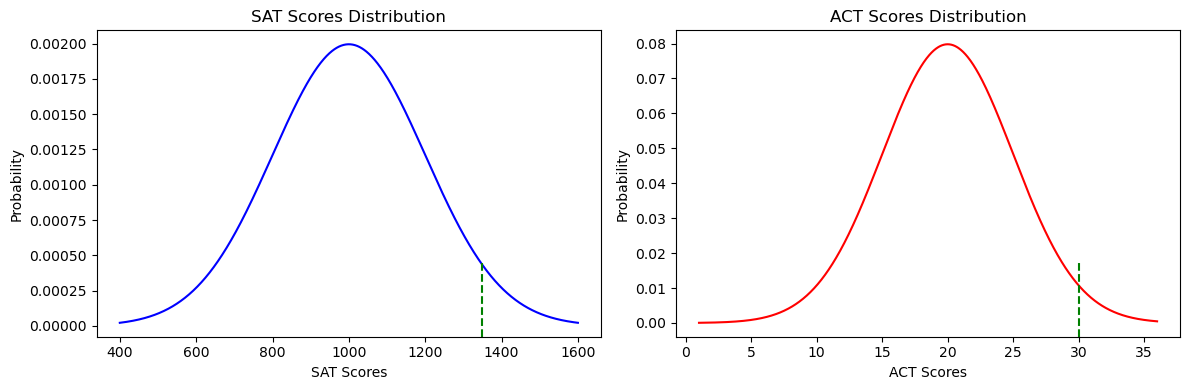

In [18]:
# Visualization of SAT and ACT distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# SAT Distribution
x_sat = np.linspace(400, 1600, 1000)
ax1.plot(x_sat, norm.pdf(x_sat, loc=sat_mu, scale=sat_sigma), color='b')
ax1.axvline(sat_top_score, ymax=0.25, linestyle='--', color='green')
ax1.set_title('SAT Scores Distribution')
ax1.set_xlabel('SAT Scores')
ax1.set_ylabel('Probability')

# ACT Distribution
x_act = np.linspace(1, 36, 1000)
ax2.plot(x_act, norm.pdf(x_act, loc=act_mu, scale=act_sigma), color='r')
ax2.axvline(act_top_score, ymax=0.25, linestyle='--', color='green')
ax2.set_title('ACT Scores Distribution')
ax2.set_xlabel('ACT Scores')
ax2.set_ylabel('Probability')

plt.tight_layout()
plt.show()
